In [112]:
import os
import sys
from glob import glob
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from tqdm.notebook import tqdm
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import multiprocessing as mp
from sklearn.metrics import confusion_matrix
import itertools

In [10]:
class cfg:
    output_path = '/data/ephemeral/home/level1-imageclassification-cv-04/code/check/validation_43_best.csv'

In [70]:
num2class = ['MASK MALE YOUNG', 'MASK MALE MIDDLE', 'MASK MALE OLD', 'MASK FEMALE YOUNG', 'MASK FEMALE MIDDLE', 'MASK FEMALE OLD', 
             'INCORRECT MALE YOUNG', 'INCORRECT MALE MIDDLE', 'INCORRECT MALE OLD', 'INCORRECT FEMALE YOUNG', 'INCORRECT FEMALE MIDDLE', 'INCORRECT FEMALE OLD',
             'NORMAL MALE YOUNG', 'NORMAL MALE MIDDLE', 'NORMAL MALE OLD', 'NORMAL FEMALE YOUNG', 'NORMAL FEMALE MIDDLE', 'NORMAL FEMALE OLD',]
num2class_dict = {v: k for v, k in enumerate(num2class)}

df = pd.read_csv(cfg.output_path)
df.head()

,imagefilepath,mask_gt,mask_predict,gender_gt,gender_predict,age_gt,age_predict
0,media/images/b4d59ece313948b70b7e.png,0,0,1,1,1,1
1,media/images/fdf36b10a9a36170416d.png,0,0,1,1,1,1
2,media/images/b96f19e4fc03f19d7fe8.png,1,1,1,1,1,1
3,media/images/eb42368b0684fc29998e.png,0,0,1,1,1,1
4,media/images/ddf4f8e0bfe3f5142c1b.png,0,0,1,1,1,1


In [90]:
df_all = pd.DataFrame([])
df['class_gt'] = df['mask_gt'] * 6 + df['gender_gt'] * 3 + df['age_gt']
df['class_predict'] = df['mask_predict'] * 6 + df['gender_predict'] * 3 + df['age_predict']
df_all['class_gt'] = df['class_gt'].map(num2class_dict)
df_all['class_predict'] = df['class_predict'].map(num2class_dict)
df_all.head()

,class_gt,class_predict
0,MASK FEMALE MIDDLE,MASK FEMALE MIDDLE
1,MASK FEMALE MIDDLE,MASK FEMALE MIDDLE
2,INCORRECT FEMALE MIDDLE,INCORRECT FEMALE MIDDLE
3,MASK FEMALE MIDDLE,MASK FEMALE MIDDLE
4,MASK FEMALE MIDDLE,MASK FEMALE MIDDLE


In [91]:
df.head()

,imagefilepath,mask_gt,mask_predict,gender_gt,gender_predict,age_gt,age_predict,class_gt,class_predict
0,media/images/b4d59ece313948b70b7e.png,0,0,1,1,1,1,4,4
1,media/images/fdf36b10a9a36170416d.png,0,0,1,1,1,1,4,4
2,media/images/b96f19e4fc03f19d7fe8.png,1,1,1,1,1,1,10,10
3,media/images/eb42368b0684fc29998e.png,0,0,1,1,1,1,4,4
4,media/images/ddf4f8e0bfe3f5142c1b.png,0,0,1,1,1,1,4,4


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'MASK MALE YOUNG'),
  Text(1, 0, 'MASK MALE MIDDLE'),
  Text(2, 0, 'MASK MALE OLD'),
  Text(3, 0, 'MASK FEMALE YOUNG'),
  Text(4, 0, 'MASK FEMALE MIDDLE'),
  Text(5, 0, 'MASK FEMALE OLD'),
  Text(6, 0, 'INCORRECT MALE YOUNG'),
  Text(7, 0, 'INCORRECT MALE MIDDLE'),
  Text(8, 0, 'INCORRECT MALE OLD'),
  Text(9, 0, 'INCORRECT FEMALE YOUNG'),
  Text(10, 0, 'INCORRECT FEMALE MIDDLE'),
  Text(11, 0, 'INCORRECT FEMALE OLD'),
  Text(12, 0, 'NORMAL MALE YOUNG'),
  Text(13, 0, 'NORMAL MALE MIDDLE'),
  Text(14, 0, 'NORMAL MALE OLD'),
  Text(15, 0, 'NORMAL FEMALE YOUNG'),
  Text(16, 0, 'NORMAL FEMALE MIDDLE'),
  Text(17, 0, 'NORMAL FEMALE OLD')])

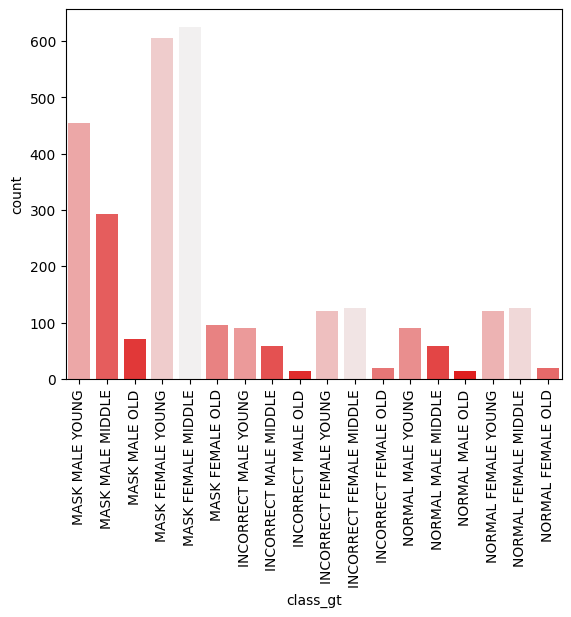

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax=sns.countplot(x='class_gt', hue='class_gt', legend=False, data=df_all, palette='light:red', order=num2class)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'MASK MALE YOUNG'),
  Text(1, 0, 'MASK MALE MIDDLE'),
  Text(2, 0, 'MASK MALE OLD'),
  Text(3, 0, 'MASK FEMALE YOUNG'),
  Text(4, 0, 'MASK FEMALE MIDDLE'),
  Text(5, 0, 'MASK FEMALE OLD'),
  Text(6, 0, 'INCORRECT MALE YOUNG'),
  Text(7, 0, 'INCORRECT MALE MIDDLE'),
  Text(8, 0, 'INCORRECT MALE OLD'),
  Text(9, 0, 'INCORRECT FEMALE YOUNG'),
  Text(10, 0, 'INCORRECT FEMALE MIDDLE'),
  Text(11, 0, 'INCORRECT FEMALE OLD'),
  Text(12, 0, 'NORMAL MALE YOUNG'),
  Text(13, 0, 'NORMAL MALE MIDDLE'),
  Text(14, 0, 'NORMAL MALE OLD'),
  Text(15, 0, 'NORMAL FEMALE YOUNG'),
  Text(16, 0, 'NORMAL FEMALE MIDDLE'),
  Text(17, 0, 'NORMAL FEMALE OLD')])

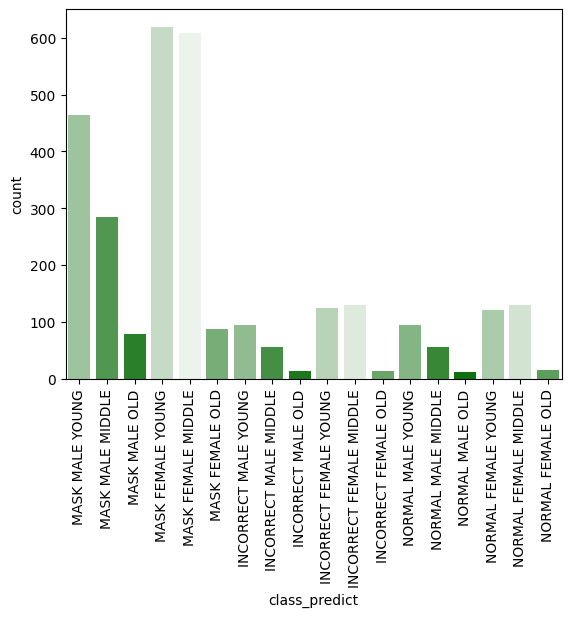

In [102]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax=sns.countplot(x='class_predict', hue='class_predict', legend=False, data=df_all, palette='light:green', order=num2class)
plt.xticks(rotation=90)

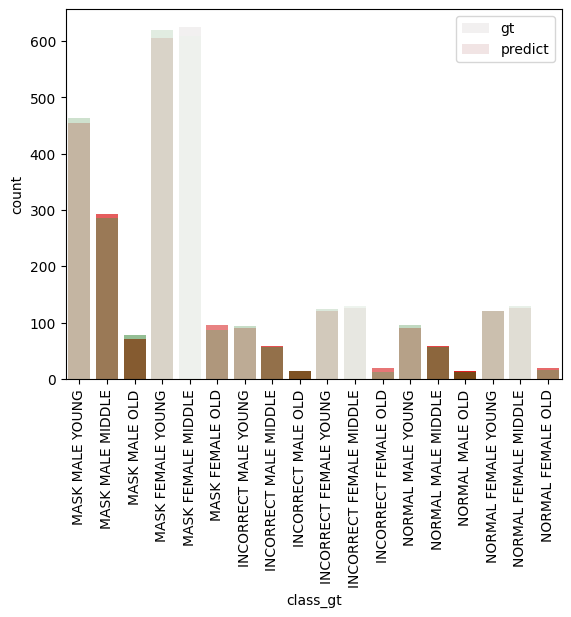

In [106]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax=sns.countplot(x='class_gt', hue='class_gt', legend=False, data=df_all, palette='light:red', order=num2class)
ax=sns.countplot(x='class_predict', hue='class_predict', legend=False, data=df_all, palette='light:green', alpha=0.5, order=num2class)
plt.xticks(rotation=90)
plt.legend(loc='upper right', labels=['gt', 'predict'])

In [113]:
def plt_cm(cm, norm=False, title='Confusion matrix', cmap=plt.cm.Blues):
    # using the matrix generated as means to plot a confusion matrix graphically
    if norm:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(num2class))
    plt.xticks(tick_marks, num2class, rotation=90)
    plt.yticks(tick_marks, num2class)

    fmt = '.2f' if norm else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


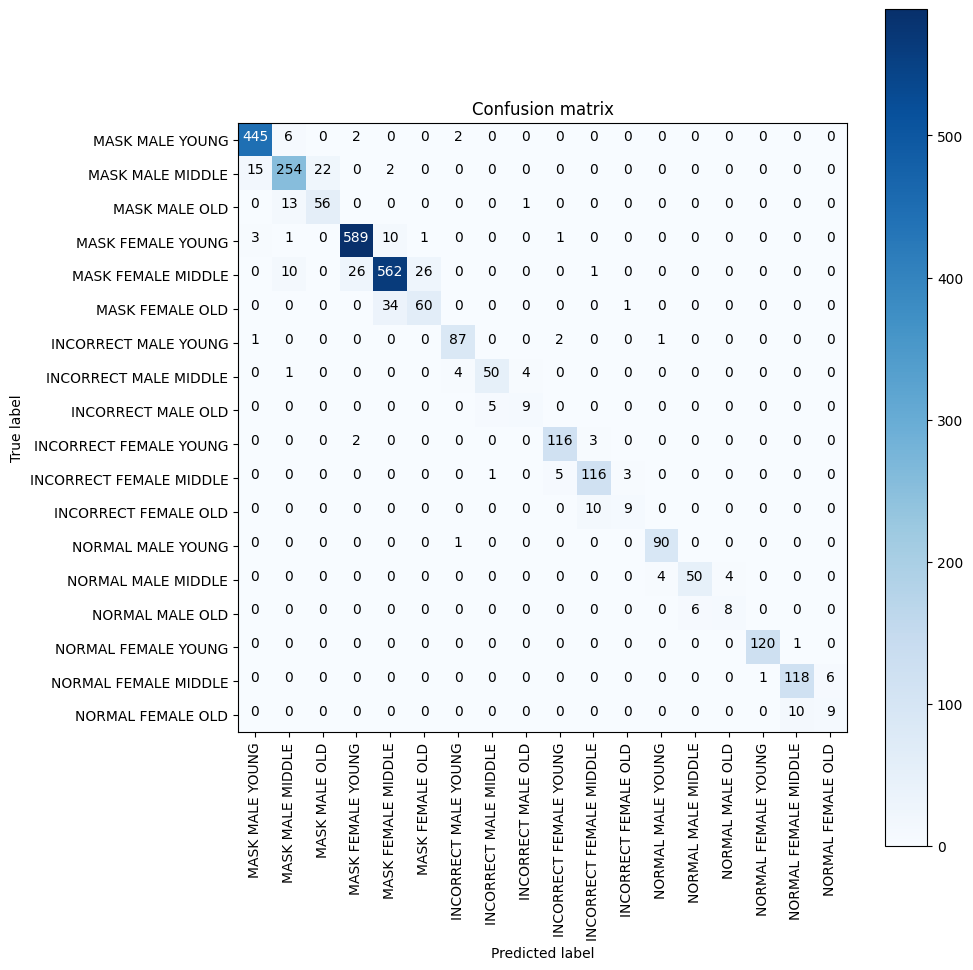

In [120]:
fig = plt.figure(figsize=(10,10))
cm = confusion_matrix(df['class_gt'].values, df['class_predict'].values)
plt_cm(cm)

**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.